# fastICA and NMF on CNeuroMod Friends


In [1]:
#first get regions where r2 is greater than 0 (feature selection but sniffing the data)...
#from nilearn_plotting_custom import plot_surf
from os import walk
import numpy as np
import seaborn as sns
sns.set("paper", "white")
%matplotlib inline
# from nilearn import plotting
import hcp_utils as hcp
import nibabel as nb
from scipy.special import softmax
# from plotting import decompose_dscalar, plot_dscalar
# import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

import glob
import h5py
import utility
# cleanpath='../data/cifti/cleaned/smoothed/'
# subject_flist = list(walk(cleanpath))[0][2:][0]

# #load the cifti2 to steal the header
# img_dir = '/om2/user/jsmentch/projects/speech_face_analysis/data/fitlins_cifti/fitlins/sub-19/'
# img_name = 'sub-19_task-MerlinMovie_space-fsLR_contrast-faceAndSpeech_stat-t_statmap.dscalar.nii'
# img = nb.load(img_dir+img_name)

# #load union of 100% coverage
# union_ind = np.load('data/subject_union_ind.npy') #100% coverage of all sujbects
# data_remove = np.where(union_ind==1, 0, 1) # where there is data set to 0, elsewhere set to 1
# X_as = np.load('data/merlin_as.npy')

/opt/miniconda-latest/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
def save_h5(h5filename,data):
    #h5filename='../outputs/test.h5'
    h5f = h5py.File(h5filename, 'w')
    h5f.create_dataset('data', data=data)
def load_h5(h5filename):
    f_test = h5py.File(h5filename, 'r')
    data = f_test[('data')]
    return data

In [3]:
class_names, as_classes_label, as_classes, labels=utility.load_yamnet_info()

## Prepare data from encoding model

In [2]:
# weights_file='../outputs/encoding_model/cneuromod/friends/as_encoding/sub-01_ses-001_s01e02a_weights.npy'
# weights=np.load(weights_file)
# scores_file='../outputs/encoding_model/cneuromod/friends/as_encoding/sub-01_ses-001_s01e02a_scores.npy'
# scores=np.load(scores_file)

# weights_list=np.array_split(weights,4,axis=1)
# weights_mean=np.mean(weights_list,axis=0)

In [ ]:
# scale weights times scores... don't do this?
# all_weights=[]
# for f in glob.glob(f'../outputs/encoding_model/cneuromod/friends/as_encoding/*scores.npy')[:100]:
#     scores_file=f
#     scores=np.load(scores_file)
#     weights_file=f'{f[:79]}weights.npy'
#     weights=np.load(weights_file)

#     weights_list=np.array_split(weights,4,axis=1)
#     weights_mean=np.mean(weights_list,axis=0)
    
#     weights_mean_scored=np.multiply(weights_mean.T,scores).T
#     all_weights.append(weights_mean_scored)
    
# weights = np.vstack(all_weights)


### actually re-save all as hdf5s

In [ ]:
# all_weights=[]
# for f in glob.glob(f'../outputs/encoding_model/cneuromod/friends/as_encoding/*scores.npy'):
#     scores_file=f
#     scores=np.load(scores_file)
#     weights_file=f'{f[:79]}weights.npy'
#     weights=np.load(weights_file)

#     weights_list=np.array_split(weights,4,axis=1)
#     weights_mean=np.mean(weights_list,axis=0)
    
#     #weights_mean_scored=np.multiply(weights_mean.T,scores).T
#     #all_weights.append(weights_mean_scored)

#     weights_out=f'{f[:79]}weights_mean.h5'
#     save_h5(weights_out,weights_mean_scored)
#     scores_out=f'{f[:79]}scores.h5'
#     save_h5(scores_out,scores)
#     print(weights_out,scores_out)
    
# #weights = np.vstack(all_weights)


### actually, save the indices and values of the weights where r2 scores>0 PER RUN as HDF5

In [ ]:
# #all_weights=[]
# for f in glob.glob(f'../outputs/encoding_model/cneuromod/friends/as_encoding/*scores.npy'):
#     scores_file=f
#     scores=np.load(scores_file)
#     weight_indices=np.nonzero(scores > 0)[0]
    
    
#     weights_file=f'{f[:79]}weights.npy'
#     weights=np.load(weights_file)
    
#     weights=weights[weight_indices,:] #get the weights with r2 greater than 0
    
#     # take mean over the 4 FIR delays
#     weights_list=np.array_split(weights,4,axis=1)
#     weights_mean=np.mean(weights_list,axis=0)
    
#     # DON'T scale weights by scores... for now
#     #weights_mean_scored=np.multiply(weights_mean.T,scores).T
#     #all_weights.append(weights_mean_scored)

#     weights_out=f'{f[:79]}weights_thresh.h5'
#     save_h5(weights_out,weights_mean)
    
#     indices_out=f'{f[:79]}weights_indices.h5'
#     save_h5(indices_out,weight_indices)
#     print(weights_out,indices_out)
    
# #weights = np.vstack(all_weights)

### get indices where r2>0 for all

In [52]:
scores_file=f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-all_scores_mean.npy'
scores=np.load(scores_file)
weight_indices=np.nonzero(scores > 0)[0]
np.save(f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-all_weight_indices.npy',weight_indices)

### actually, save the indices and mean values of the weights where r2 scores>0 OVER ALL SUBJECTS

In [ ]:
# weight_indices=np.load(f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-all_weight_indices.npy')
# for f in glob.glob(f'../outputs/encoding_model/cneuromod/friends/as_encoding/*scores.npy'):
    
#     weights_file=f'{f[:79]}weights.npy'
#     weights=np.load(weights_file)
    
#     weights=weights[weight_indices,:] #get the weights with mean r2 greater than 0
    
#     # take mean over the 4 FIR delays
#     weights_list=np.array_split(weights,4,axis=1)
#     weights_mean=np.mean(weights_list,axis=0)
    
#     # DON'T scale weights by scores... for now
#     #weights_mean_scored=np.multiply(weights_mean.T,scores).T
#     #all_weights.append(weights_mean_scored)

#     weights_out=f'{f[:79]}weights_thresh.h5'
#     save_h5(weights_out,weights_mean)

#     print(weights_out)
# #weights = np.vstack(all_weights)

### load into an hdf5 virtual dataset

In [56]:
all_weights=[]
#all_scores=[]
for f in glob.glob(f'../outputs/encoding_model/cneuromod/friends/as_encoding/*scores.npy'):
    
    weights_file=f'{f[:79]}weights_thresh.h5'
    #scores_file=f'{f[:79]}scores.h5'
    weights=load_h5(weights_file)
    #scores=load_h5(scores_file)


    all_weights.append(weights.shape)
    #all_scores.append(scores)
    
#weights = np.vstack(all_weights)
#sum_grayordinates=sum([s.shape[0] for s in all_weights])
sum_grayordinates=sum(  [s[0] for s in all_weights]  )

current_i=0

layout = h5py.VirtualLayout(shape=(sum_grayordinates, 521), dtype='f8')

#for n in all_weights:
for i,f in enumerate( glob.glob(f'../outputs/encoding_model/cneuromod/friends/as_encoding/*weights_thresh.h5')):
    #print(f'current i = {current_i}')
    #filename = "{}.h5".format(n)
    vsource = h5py.VirtualSource(f, 'data', shape=all_weights[i])
    current_length=all_weights[i][0]
    #print(f'current length= {current_length}')
    layout[current_i:current_i+current_length,:] = vsource
    current_i=current_i+current_length
# Add virtual dataset to output file
with h5py.File(f'../outputs/encoding_model/cneuromod/friends/as_encoding/all_weights_VDS.h5', 'w', libver='latest') as f:
    f.create_virtual_dataset('data', layout, fillvalue=-5)

### also create some smaller  virtual datasets for testing

In [57]:
for vds_n in [5,10,15,20]:
    all_weights=[]
    #all_scores=[]
    for f in glob.glob(f'../outputs/encoding_model/cneuromod/friends/as_encoding/*scores.npy')[:vds_n]:

        weights_file=f'{f[:79]}weights_thresh.h5'
        #scores_file=f'{f[:79]}scores.h5'
        weights=load_h5(weights_file)
        #scores=load_h5(scores_file)


        all_weights.append(weights.shape)
        #all_scores.append(scores)

    #weights = np.vstack(all_weights)
    #sum_grayordinates=sum([s.shape[0] for s in all_weights])
    sum_grayordinates=sum(  [s[0] for s in all_weights]  )

    current_i=0

    layout = h5py.VirtualLayout(shape=(sum_grayordinates, 521), dtype='f8')

    #for n in all_weights:
    for i,f in enumerate( glob.glob(f'../outputs/encoding_model/cneuromod/friends/as_encoding/*weights_thresh.h5')[:vds_n]):
        #print(f'current i = {current_i}')
        #filename = "{}.h5".format(n)
        vsource = h5py.VirtualSource(f, 'data', shape=all_weights[i])
        current_length=all_weights[i][0]
        #print(f'current length= {current_length}')
        layout[current_i:current_i+current_length,:] = vsource
        current_i=current_i+current_length
    # Add virtual dataset to output file
    with h5py.File(f'../outputs/encoding_model/cneuromod/friends/as_encoding/all_weights_VDS_test{vds_n}.h5', 'w', libver='latest') as f:
        f.create_virtual_dataset('data', layout, fillvalue=-5)

### actually, save the indices and MAX values of the weights where r2 scores>0 OVER ALL SUBJECTS

In [ ]:
weight_indices=np.load(f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-all_weight_indices.npy')
for f in glob.glob(f'../outputs/encoding_model/cneuromod/friends/as_encoding/*scores.npy'):
    
    weights_file=f'{f[:79]}weights.npy'
    sub=f[56:62]
    ses=f[63:70]
    task=f[71:78]
    
    weights=np.load(weights_file)
    
    weights=weights[weight_indices,:] #get the weights with mean r2 greater than 0
    
    # take MAX over the 4 FIR delays
    weights_list=np.array_split(weights,4,axis=1)
    weights_max=np.max(weights_list,axis=0)
    
    # DON'T scale weights by scores... for now
    #weights_mean_scored=np.multiply(weights_mean.T,scores).T
    #all_weights.append(weights_mean_scored)

    #weights_out=f'{f[:79]}weights_thresh.h5'
    weights_out=f'/om2/scratch/Thu/jsmentch/cneuromod_scratch/as_encoding/{sub}_{ses}_{task}_weights_thresh_max.h5'

    save_h5(weights_out,weights_max)

    print(weights_out)
#weights = np.vstack(all_weights)

In [35]:
# AND LOAD INTO VIRTUAL DATASET
all_weights=[]
#all_scores=[]
for f in glob.glob(f'/om2/scratch/Thu/jsmentch/cneuromod_scratch/as_encoding/*weights_thresh_max.h5'):
    weights=load_h5(f)
    all_weights.append(weights.shape)
    #all_scores.append(scores)
    
#weights = np.vstack(all_weights)
#sum_grayordinates=sum([s.shape[0] for s in all_weights])
sum_grayordinates=sum(  [s[0] for s in all_weights]  )

current_i=0

layout = h5py.VirtualLayout(shape=(sum_grayordinates, 521), dtype='f8')

#for n in all_weights:
for i,f in enumerate( glob.glob(f'/om2/scratch/Thu/jsmentch/cneuromod_scratch/as_encoding/*weights_thresh_max.h5')):
    #print(f'current i = {current_i}')
    #filename = "{}.h5".format(n)
    vsource = h5py.VirtualSource(f, 'data', shape=all_weights[i])
    current_length=all_weights[i][0]
    #print(f'current length= {current_length}')
    layout[current_i:current_i+current_length,:] = vsource
    current_i=current_i+current_length
# Add virtual dataset to output file
with h5py.File(f'/om2/scratch/Thu/jsmentch/cneuromod_scratch/as_encoding/all_weights_VDS.h5', 'w', libver='latest') as f:
    f.create_virtual_dataset('data', layout, fillvalue=-5)

### for each subject, get the mean r2 score and plot

In [40]:
import analysis
for s in [1,2,3,4,5,6]:
    all_scores=[]
    #all_scores=[]
    for f in glob.glob(f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-0{s}*scores.npy'):
        scores=np.load(f)
#         weights_file=f'{f[:79]}weights_thresh.h5'
#         #scores_file=f'{f[:79]}scores.h5'
#         weights=load_h5(weights_file)
        #scores=load_h5(scores_file)


        all_scores.append(scores)
        #all_scores.append(scores)
    all_scores = np.vstack(all_scores)
    all_scores_mean=all_scores.mean(axis=0)
    np.save(f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-0{s}_scores_mean.npy',all_scores_mean)
    #analysis.plot_results(all_scores_mean,'r2','32k',vertex_info=None,subject=f'sub-0{s}',feature='as_scores',dataset='friends',title=f'mean_r2_all_runs{c}')


### for all subjects, get the mean r2 and plot

In [41]:
import analysis
all_scores=[]
#all_scores=[]
for f in glob.glob(f'../outputs/encoding_model/cneuromod/friends/as_encoding/*scores.npy'):
    scores=np.load(f)
#         weights_file=f'{f[:79]}weights_thresh.h5'
#         #scores_file=f'{f[:79]}scores.h5'
#         weights=load_h5(weights_file)
    #scores=load_h5(scores_file)


    all_scores.append(scores)
    #all_scores.append(scores)
all_scores = np.vstack(all_scores)
all_scores_mean=all_scores.mean(axis=0)
np.save(f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-all_scores_mean.npy',all_scores_mean)
analysis.plot_results(all_scores_mean,'r2','32k',vertex_info=None,subject=f'sub-all',feature='as_scores',dataset='friends',title=f'mean_r2_all_runs{c}')


[-0.0520496  -0.05199764 -0.05171949 ...  0.30888263  0.30995738
  2.        ]
[-0.05180315 -0.05177843 -0.05164941 ...  0.32446682  0.32626893
  2.        ]
[-0.0520496  -0.05199764 -0.05171949 ...  0.30888263  0.30995738
  2.        ]
[-0.05180315 -0.05177843 -0.05164941 ...  0.32446682  0.32626893
  2.        ]


## Run FastICA

In [6]:
from sklearn.decomposition import FastICA

### run on all data (~9k grayordinates with r2>0)  with fastICA, 3 comoponents (takes maybe 150-200G memory and 30 minutes)

running ICA on everythiing, 3 components
1442.291867017746

running ICA on everythiing, 5 components
1406.599483013153

In [9]:
import time
n_components=5
start = time.time()
print(f"running ICA on everythiing, {n_components} components, start: {start}")

ica=FastICA(whiten=True,n_components=n_components,tol=0.0001,max_iter=200) #max_iter=200 is default  #tol=0.0001,
#with h5py.File(f'../outputs/encoding_model/cneuromod/friends/as_encoding/all_weights_VDS.h5', "r") as f:
with h5py.File(f'/om2/scratch/Thu/jsmentch/cneuromod_scratch/as_encoding/all_weights_VDS.h5', "r") as f:
    S_ = ica.fit_transform(f["data"])  # Reconstruct signals
    A_ = ica.mixing_  # Get estimated mixing matrix
end = time.time()
print(f'end: {end}')
print(end - start) 

running ICA on everythiing, 5 components
1406.599483013153


In [11]:
save_h5(f'../outputs/encoding_model/cneuromod/friends/as_encoding/ICA_all_max_S_.h5',S_)
save_h5(f'../outputs/encoding_model/cneuromod/friends/as_encoding/ICA_all_max_A_.h5',A_)

## Plot ICA Results

In [5]:
S_=load_h5(f'../outputs/encoding_model/cneuromod/friends/as_encoding/ICA_all_max_S_.h5')
A_=load_h5(f'../outputs/encoding_model/cneuromod/friends/as_encoding/ICA_all_max_A_.h5')

In [6]:
# 5046552/9044 #558 number of runs
# 558/6 # 93 runs per subject

In [7]:
S_mean= np.mean(S_[:,:].reshape(-1,9044,S_.shape[1]),axis=0)
S_mean.shape

#if plotting whole brains

# S_mean= np.mean(S_.reshape(-1,91282,S_.shape[1]),axis=0)
# S_mean.shape

(9044, 5)

seems like, at least with a few runs, 3 PCs explaine most of variance....

In [8]:
#todo?
#run minibatch PCA to see how many components
#run minimbatch NNMF to decompose it

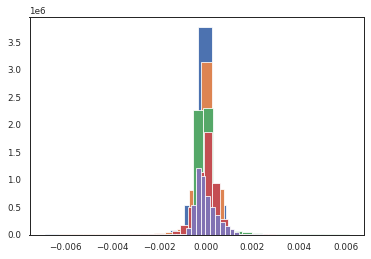

In [9]:
for s in [0,1,2,3,4]:
    plt.hist(S_[:,s],20)

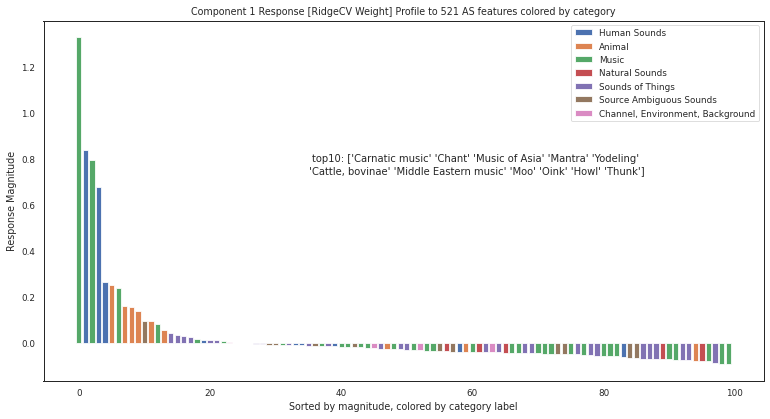

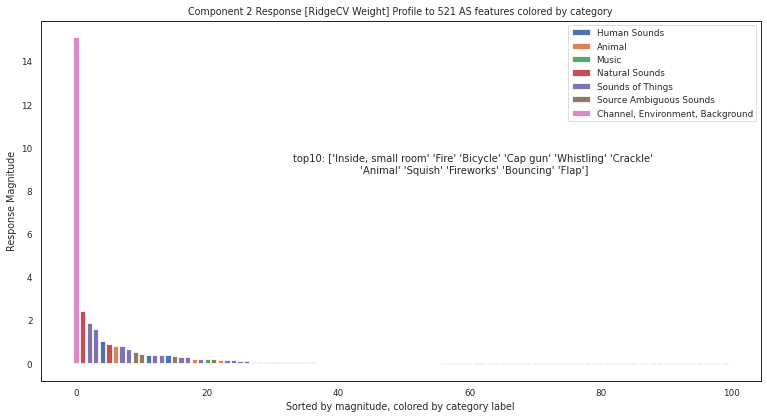

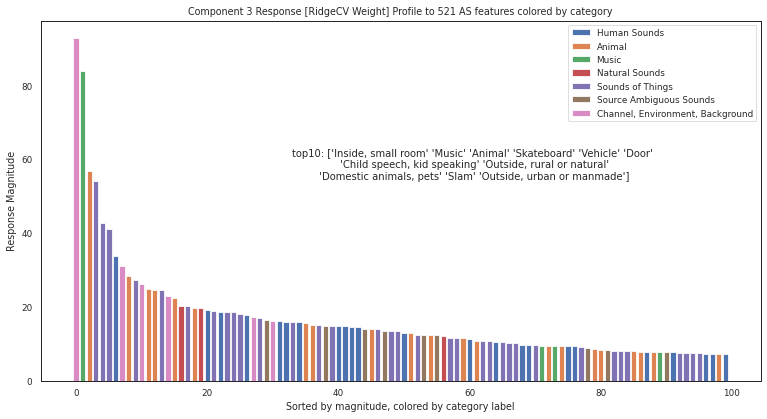

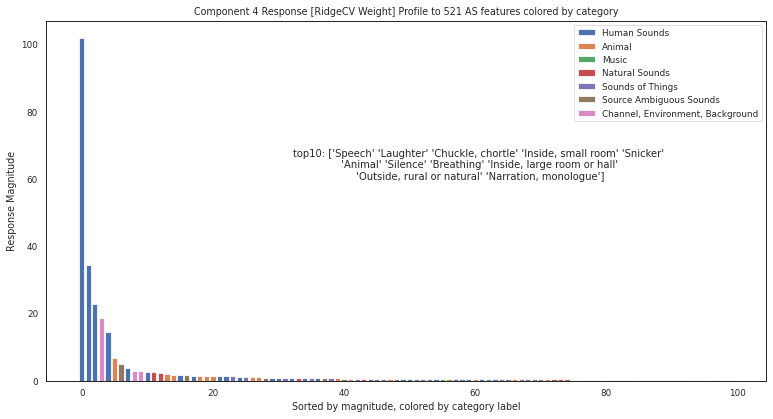

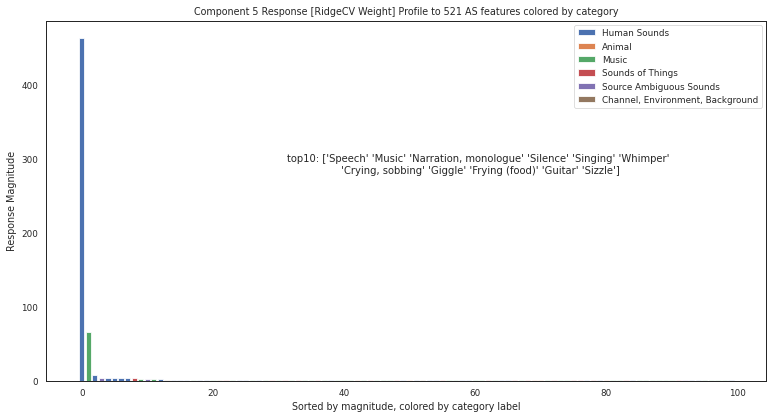

In [13]:
num_components=5

for c in np.arange(num_components):
    c1_response = A_[:,c]
    c1_ind = np.argsort(c1_response)[::-1]
    c1_response_sorted = c1_response[c1_ind]
    c1_category_sorted = as_classes[c1_ind]
    c1_category_str_sorted = as_classes_label[c1_ind]

    top_components=100
    x_cat_str = c1_category_str_sorted[0:top_components]
    x_cat = c1_category_sorted[0:top_components]
    x_val = c1_response_sorted[0:top_components]
    x_pos = np.array([i for i, _ in enumerate(x_val)])
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([0, 0, 1, 1])
    for i in np.arange(7):
        cat_ind = np.squeeze(np.where(x_cat == i)[0])
        if cat_ind.any():
            plt.bar(x_pos[cat_ind], x_val[cat_ind],label=labels[i])

    plt.xlabel("Sorted by magnitude, colored by category label")
    plt.ylabel("Response Magnitude")
    plt.title(f"Component {c+1} Response [RidgeCV Weight] Profile to 521 AS features colored by category")
    plt.legend()
    plt.text(0.6, 0.6, 'top10: '+str(class_names[c1_ind][0:11]), fontsize=10, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.savefig(f'../outputs/figures/ica/cneuromoe_all_component_MAX_{c}.png')

### plot 9k MAX weights brain

In [10]:
import analysis
weight_indices=np.load(f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-all_weight_indices.npy')
#plot mean weights of each component
for c in np.arange(5):
    current_vx = S_mean[:,c]
    r2_91k = np.zeros(91282)
    r2_91k[:] = 0
    #r2_91k[r2_roi_91k_ind] = current_vx[:len(r2_roi_91k_ind)]
    r2_91k[weight_indices] = current_vx#[:len(r2_roi_91k_ind)]
    analysis.plot_results(r2_91k,'c_weights','32k',vertex_info=None,subject='sub-all',feature='as_scores',dataset='friends',title=f'MAX_ICA_component{c}')


/om2/vast/gablab/jsmentch/projects/nat_img/code/nilearn_plotting_custom.py:184: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(figure, rect=[0, 0, 1, 1],


[0.45716196 0.45716568 0.45858009 ... 0.54352545 0.54365529 0.54426328]
[0.44605789 0.44613275 0.44703018 ... 0.54270842 0.54288967 0.54316041]
[0.45716196 0.45716568 0.45858009 ... 0.54352545 0.54365529 0.54426328]
[0.44605789 0.44613275 0.44703018 ... 0.54270842 0.54288967 0.54316041]
[0.44942514 0.44950385 0.45024984 ... 0.52743268 0.52753174 0.54738813]
[0.4672778  0.46800985 0.46803666 ... 0.53904218 0.54124965 0.54738813]
[0.44942514 0.44950385 0.45024984 ... 0.52743268 0.52753174 0.54738813]
[0.4672778  0.46800985 0.46803666 ... 0.53904218 0.54124965 0.54738813]
[0.44451914 0.46997541 0.47003631 ... 0.52576898 0.52592864 0.52600826]
[0.44451914 0.47483974 0.47493984 ... 0.52699105 0.52700442 0.52706801]
[0.44451914 0.46997541 0.47003631 ... 0.52576898 0.52592864 0.52600826]
[0.44451914 0.47483974 0.47493984 ... 0.52699105 0.52700442 0.52706801]
[0.38329439 0.3837776  0.38379632 ... 0.57094995 0.57101021 0.5710689 ]
[0.36158626 0.36167    0.36199124 ... 0.56494776 0.56506037 0.56

### plot 91k mean weights brain

In [142]:
import analysis
#plot mean weights of each component
for c in np.arange(6):
    current_vx = S_mean[:,c]
    analysis.plot_results(current_vx,'c_weights','32k',vertex_info=None,subject='sub-01',feature='as_scores',dataset='friends',title=f'ICA_component{c}')
#     r2_91k = np.zeros(91282)
#     r2_91k[:] = 0
#     r2_91k[r2_roi_91k_ind] = current_vx[:len(r2_roi_91k_ind)]

#     #plot one subject trained on 1 tested on 1 Ridge 
#     fig = plt.figure(figsize=(20,20))
#     plot_surf(hcp.mesh.very_inflated,\
#     hcp.cortex_data(r2_91k), hemi='left',cmap='viridis', colorbar=True,symmetric_cmap=False, vmin=0, vmax=0.01, avg_method='median',#figure=fig,\
#     bg_map=hcp.mesh.sulc,\
#     data_alpha=hcp.cortex_data(r2_all_binary),\
#     data_remove=hcp.cortex_data(data_remove), title=f'mean brainordinate weight component{c+1}')
#     plt.savefig(f'ica_out/l_component{c+1}.png')

/om2/vast/gablab/jsmentch/projects/nat_img/code/nilearn_plotting_custom.py:184: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(figure, rect=[0, 0, 1, 1],


[-0.01424102 -0.014174   -0.01402739 ...  0.01086478  0.01092141
  0.01099511]
[-0.01598871 -0.01597792 -0.01545781 ...  0.01031341  0.01034574
  0.01047051]
[-0.01424102 -0.014174   -0.01402739 ...  0.01086478  0.01092141
  0.01099511]
[-0.01598871 -0.01597792 -0.01545781 ...  0.01031341  0.01034574
  0.01047051]
[-0.00485827 -0.00481999 -0.00474813 ...  0.00990884  0.01001659
  0.01014402]
[-0.00474028 -0.0047291  -0.00472694 ...  0.01129582  0.01145764
  0.01151315]
[-0.00485827 -0.00481999 -0.00474813 ...  0.00990884  0.01001659
  0.01014402]
[-0.00474028 -0.0047291  -0.00472694 ...  0.01129582  0.01145764
  0.01151315]
[-0.02041855 -0.02009289 -0.02002978 ...  0.01145263  0.01152123
  0.01170257]
[-0.02084164 -0.02071429 -0.02069111 ...  0.01666227  0.01705872
  0.01716819]
[-0.02041855 -0.02009289 -0.02002978 ...  0.01145263  0.01152123
  0.01170257]
[-0.02084164 -0.02071429 -0.02069111 ...  0.01666227  0.01705872
  0.01716819]
[-0.02408349 -0.02374497 -0.02362289 ...  0.0089693 

## Run NMF

need to make it non-negative first - it took an hour to run

In [4]:
from sklearn.decomposition import NMF
import time
n_components=5

start = time.time()
print(f"running NMF on everything, {n_components} components, start: {start}")

model = NMF(n_components=n_components, init='random')
with h5py.File(f'/om2/scratch/Thu/jsmentch/cneuromod_scratch/as_encoding/all_weights_VDS.h5', "r") as f:
    X = f["data"][:,:] - f["data"][:,:].min()
    
    W = model.fit_transform(X)
    H = model.components_
    
    
end = time.time()
print(f'end: {end}')
print(end - start) 

save_h5(f'../outputs/encoding_model/cneuromod/friends/as_encoding/NMF_all_max_W.h5',W) #S_
save_h5(f'../outputs/encoding_model/cneuromod/friends/as_encoding/NMF_all_max_H.h5',H) #A_

running NMF on everything, 5 components, start: 1667500507.0418618


/opt/miniconda-latest/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


end: 1667504356.4048028
3849.3629410266876


NameError: name 'S_' is not defined

In [5]:
save_h5(f'../outputs/encoding_model/cneuromod/friends/as_encoding/NMF_all_max_W.h5',W)
save_h5(f'../outputs/encoding_model/cneuromod/friends/as_encoding/NMF_all_max_H.h5',H)

### plot NMF

In [6]:
W.shape

(5046552, 5)

In [7]:
W_mean= np.mean(W[:,:].reshape(-1,9044,W.shape[1]),axis=0)
W_mean.shape

#if plotting whole brains

# S_mean= np.mean(S_.reshape(-1,91282,S_.shape[1]),axis=0)
# S_mean.shape

(9044, 5)

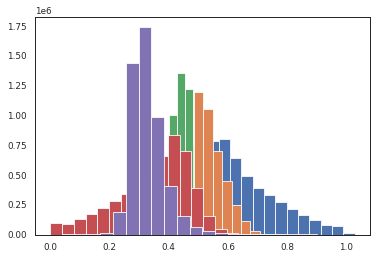

In [8]:
for s in [0,1,2,3,4]:
    plt.hist(W[:,s],20)

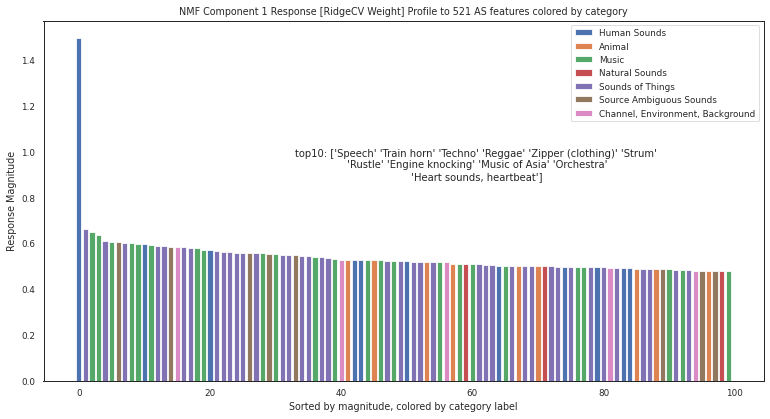

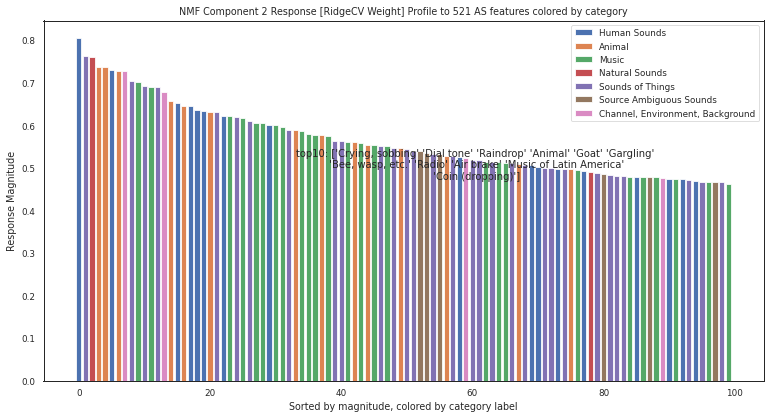

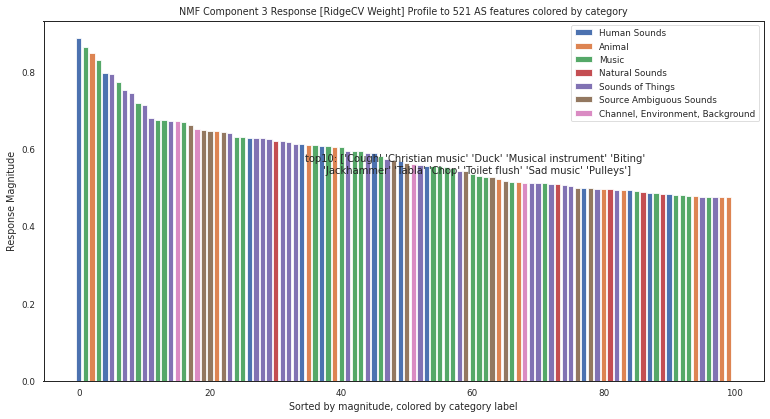

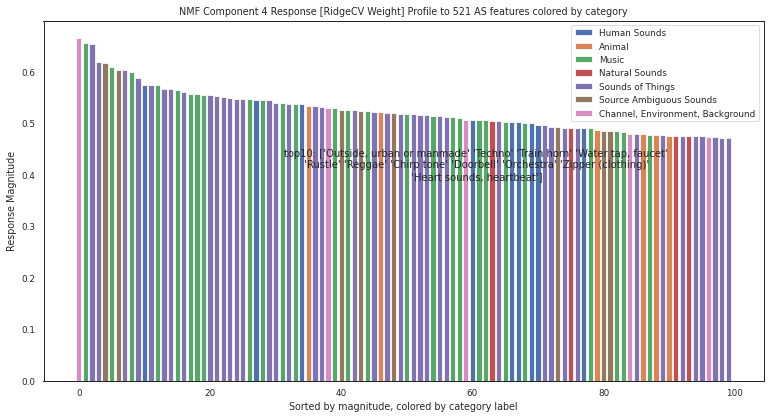

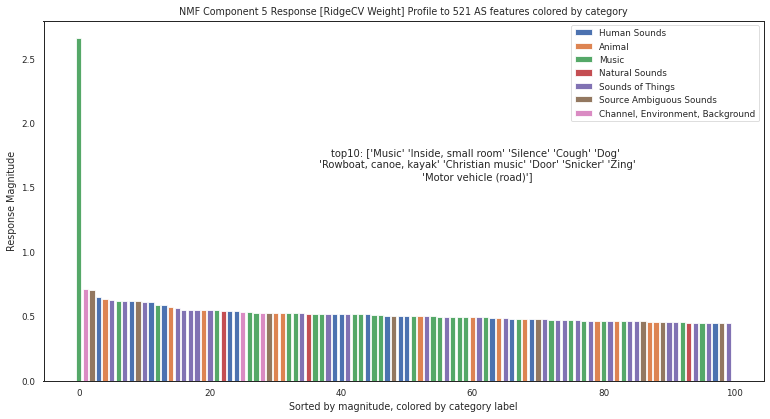

In [12]:
num_components=5

for c in np.arange(num_components):
    c1_response = H.T[:,c]
    c1_ind = np.argsort(c1_response)[::-1]
    c1_response_sorted = c1_response[c1_ind]
    c1_category_sorted = as_classes[c1_ind]
    c1_category_str_sorted = as_classes_label[c1_ind]

    top_components=100
    x_cat_str = c1_category_str_sorted[0:top_components]
    x_cat = c1_category_sorted[0:top_components]
    x_val = c1_response_sorted[0:top_components]
    x_pos = np.array([i for i, _ in enumerate(x_val)])
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([0, 0, 1, 1])
    for i in np.arange(7):
        cat_ind = np.squeeze(np.where(x_cat == i)[0])
        if cat_ind.any():
            plt.bar(x_pos[cat_ind], x_val[cat_ind],label=labels[i])

    plt.xlabel("Sorted by magnitude, colored by category label")
    plt.ylabel("Response Magnitude")
    plt.title(f"NMF Component {c+1} Response [RidgeCV Weight] Profile to 521 AS features colored by category")
    plt.legend()
    plt.text(0.6, 0.6, 'top10: '+str(class_names[c1_ind][0:11]), fontsize=10, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.savefig(f'../outputs/figures/ica/NMF_cneuromod_all_component_MAX_{c}.png')

In [19]:
import importlib
importlib.reload(analysis)
weight_indices=np.load(f'../outputs/encoding_model/cneuromod/friends/as_encoding/sub-all_weight_indices.npy')
#plot mean weights of each component
for c in np.arange(5):
    current_vx = W_mean[:,c]
    r2_91k = np.zeros(91282)
    r2_91k[:] = 0
    #r2_91k[r2_roi_91k_ind] = current_vx[:len(r2_roi_91k_ind)]
    r2_91k[weight_indices] = current_vx#[:len(r2_roi_91k_ind)]
    analysis.plot_results(r2_91k,'nmf_weights','32k',vertex_info=None,subject='sub-all',feature='as_scores',dataset='friends',title=f'MAX_NMF_component{c}')


[0.         0.54031095 0.54049123 ... 0.84582613 0.84626337 0.84647119]
[0.         0.53530337 0.5356459  ... 0.84889606 0.84896587 0.84959184]
[0.         0.54031095 0.54049123 ... 0.84582613 0.84626337 0.84647119]
[0.         0.53530337 0.5356459  ... 0.84889606 0.84896587 0.84959184]
[0.         0.46067709 0.46074475 ... 0.61141407 0.61144955 0.6115093 ]
[0.         0.44005661 0.44039119 ... 0.61045207 0.61047572 0.61139173]
[0.         0.46067709 0.46074475 ... 0.61141407 0.61144955 0.6115093 ]
[0.         0.44005661 0.44039119 ... 0.61045207 0.61047572 0.61139173]
[0.         0.35957405 0.35970561 ... 0.47602434 0.47603251 0.47603429]
[0.         0.35560054 0.3557385  ... 0.47603136 0.47603173 0.47603275]
[0.         0.35957405 0.35970561 ... 0.47602434 0.47603251 0.47603429]
[0.         0.35560054 0.3557385  ... 0.47603136 0.47603173 0.47603275]
[0.         0.14199276 0.14229024 ... 0.46289993 0.46312074 0.46319163]
[0.         0.14001675 0.14125262 ... 0.4686114  0.46903181 0.47

In [41]:
weights_list[0].shape

(91282, 521)

In [3]:
#import r2 scores, get mean r2 score from encoding model of each subject
r2_all=[]
for s_f in subject_flist:
    sub = s_f[:6]
    #print(sub)
    r2=np.load(f'{data_dir}{sub}_r2scores.npy')
    r2=np.mean(r2,axis=0)
    #r2=np.where(r2>0,1,0)
    r2_all.append(r2)

In [4]:
# # get union of r2>0, see how many voxels that is
# r2_all = np.asarray(r2_all)
# r2_all = np.prod(r2_all, axis=0)
# r2_all*data_remove
# np.unique(r2_all*np.where(union_ind==1, 1, 0), return_counts=True)

In [5]:
# see which voxels are mean r2>0 across participants
r2_all = np.asarray(r2_all)
r2_all_vals = np.mean(r2_all, axis=0)
r2_all_binary = np.where(r2_all_vals>0, 1,0) * np.where(union_ind==1, 1, 0)
np.unique(r2_all_binary, return_counts=True)

(array([0, 1]), array([89561,  1721]))

In [6]:
r2_alpha = r2_all_vals*r2_all_binary

In [7]:
r2_roi_91k_ind = np.squeeze(np.argwhere(r2_all_binary==1)) #indices of the mean r2>0 voxels
r2_roi_91k = np.zeros(91282)
r2_roi_91k[r2_roi_91k_ind] = 1


In [10]:
np.save('data/r2_stg_roi.np',r2_roi_91k_ind)

[0. 1.]


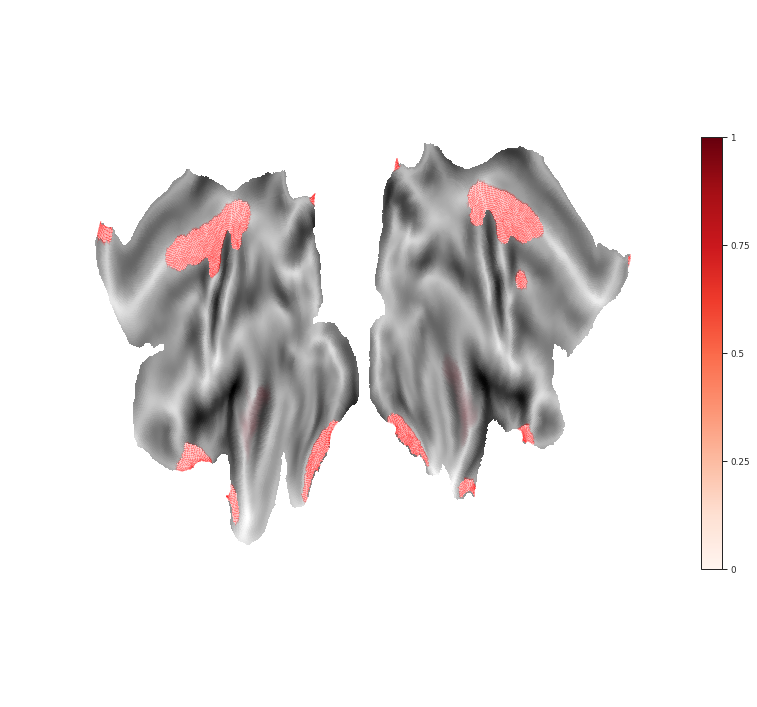

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Error in callback <function flush_figures at 0x2b754a949dc0> (for post_execute):
Traceback (most recent call last):
  File "/opt/miniconda-latest/lib/python3.8/site-packages/IPython/core/events.py", line 89, in trigger
    func(*args, **kwargs)
  File "/opt/miniconda-latest/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py", line 121, in flush_figures
    return show(True)
  File "/opt/miniconda-latest/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py", line 41, in show
    display(
  File "/opt/miniconda-latest/lib/python3.8/site-packages/IPython/core/display.py", line 313, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/opt/miniconda-latest/lib/python3.8/site-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
  File "<decorator-gen-2>", line 2, in __call__
  File "/opt/miniconda-latest/lib/python3.8/site-packages/IPython/core/formatters.py", line 224, in catch_format_error
    r = me

In [ ]:
plot_surf(hcp.mesh.flat,\
    hcp.cortex_data(r2_roi_91k), cmap='Reds', colorbar=True,symmetric_cmap=False, avg_method='median',#figure=fig,\
    bg_map=hcp.mesh.sulc,\
    data_alpha=hcp.cortex_data(r2_alpha),\
    data_remove=hcp.cortex_data(data_remove))

## now import all of the subjects, apply the mask, and stack them in an arry of their weights for voxel decomp

In [51]:
weights_all=[]
for s_f in subject_flist:
    sub = s_f[:6]
    print(sub)
    weights=np.load(f'{data_dir}{sub}_weights.npy')
    weights = weights[:,r2_roi_91k_ind , :]
    weights=np.mean(weights,axis=0)
    weights_all.append(weights)
weights = np.vstack(weights_all)


sub-19
sub-20
sub-21
sub-22
sub-23
sub-24
sub-25
sub-26
sub-27
sub-28
sub-29
sub-30
sub-31
sub-32
sub-33
sub-34
sub-35
sub-36


In [55]:
weights.shape

(30978, 521)

In [56]:
from sklearn.decomposition import FastICA

In [77]:
ica=FastICA(whiten=True,n_components=6,tol=0.01,max_iter=1000) #max_iter=200 is default  #tol=0.0001,

In [78]:
S_ = ica.fit_transform(weights)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

In [79]:
np.save('data/fast_ICA_wbr2_A.npy',A_)
np.save('data/fast_ICA_wbr2_S.npy',S_)

In [80]:
class_names = np.load('/om2/user/jsmentch/data/yamnet_output/yamnet_class_names.npy')
as_classes_label = np.zeros((521),dtype='S30')
as_classes = np.zeros((521))
as_classes.shape#as_classes = [None] * 521

(521,)

In [81]:
as_classes[0:66]=0
as_classes[66:132]=1
as_classes[132:277]=2
as_classes[277:294]=3
as_classes[294:453]=4
as_classes[453:500]=5
as_classes[500:]=6

as_classes_label[0:66]='Human Sounds'
as_classes_label[66:132]='Animal'
as_classes_label[132:277]='Music'
as_classes_label[277:294]='Natural Sounds'
as_classes_label[294:453]='Sounds of Things'
as_classes_label[453:500]='Source Ambiguous Sounds'
as_classes_label[500:]='Channel, Environment, Background'

labels=['Human Sounds','Animal','Music','Natural Sounds','Sounds of Things','Source Ambiguous Sounds','Channel, Environment, Background']

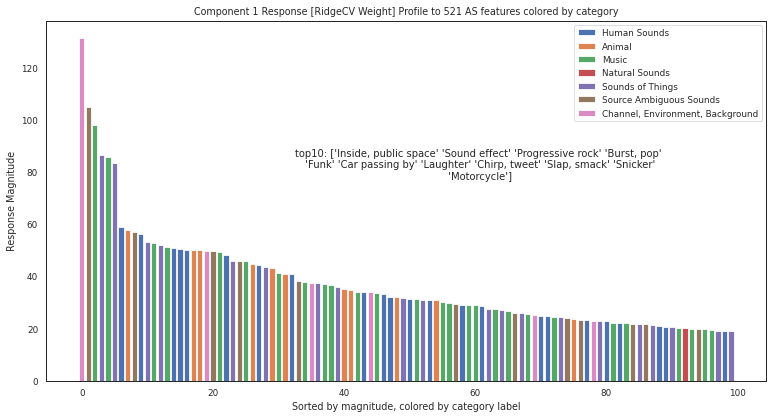

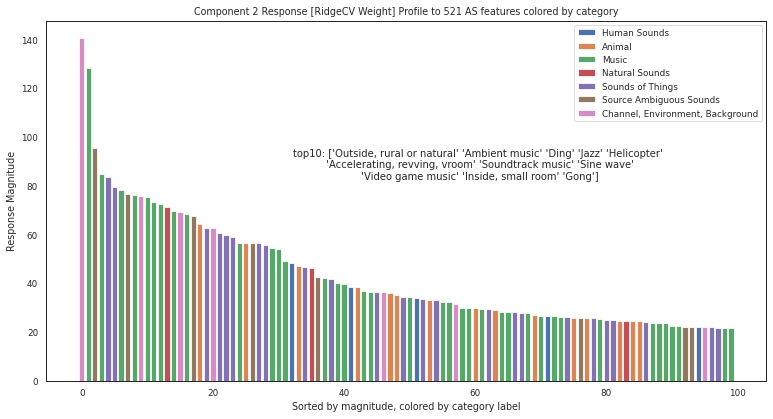

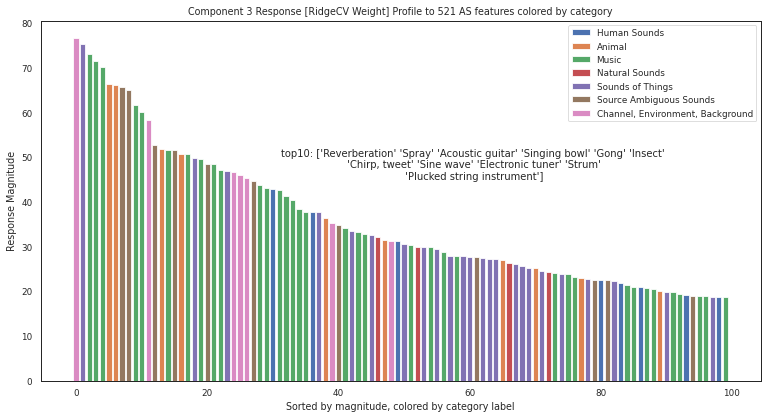

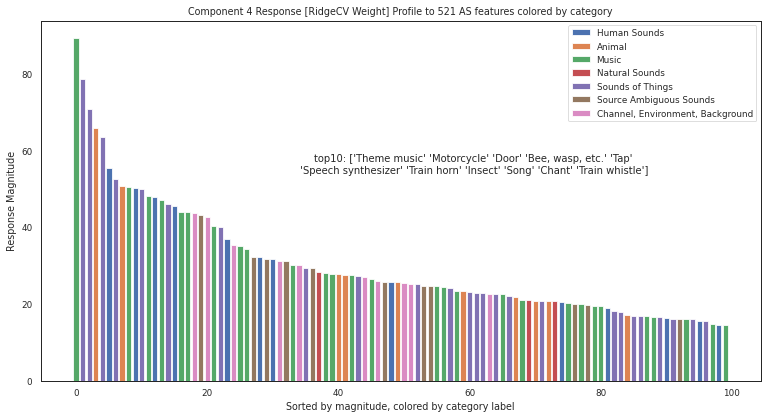

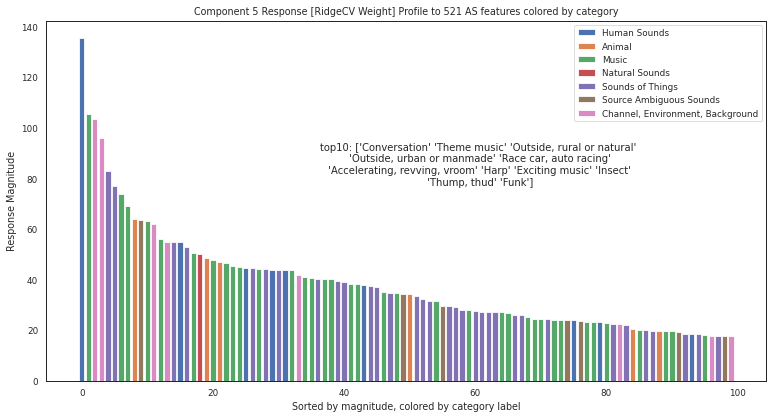

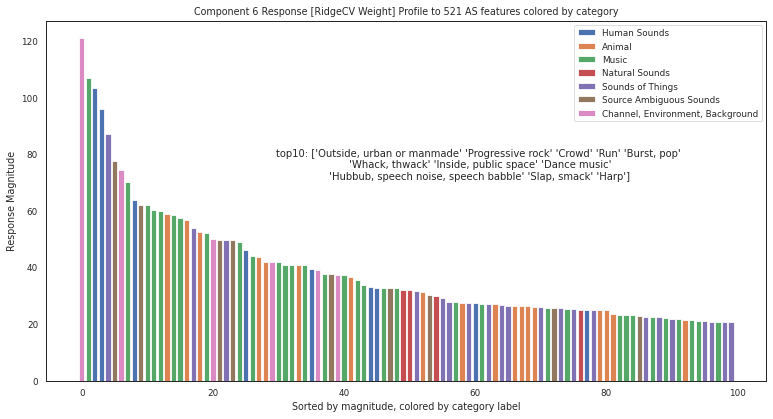

In [112]:
for c in np.arange(6):
    c1_response = A_[:,c]
    c1_ind = np.argsort(c1_response)[::-1]
    c1_response_sorted = c1_response[c1_ind]
    c1_category_sorted = as_classes[c1_ind]
    c1_category_str_sorted = as_classes_label[c1_ind]

    top_components=100
    x_cat_str = c1_category_str_sorted[0:top_components]
    x_cat = c1_category_sorted[0:top_components]
    x_val = c1_response_sorted[0:top_components]
    x_pos = np.array([i for i, _ in enumerate(x_val)])
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_axes([0, 0, 1, 1])
    for i in np.arange(7):
        cat_ind = np.squeeze(np.where(x_cat == i)[0])
        if cat_ind.any():
            plt.bar(x_pos[cat_ind], x_val[cat_ind],label=labels[i])

    plt.xlabel("Sorted by magnitude, colored by category label")
    plt.ylabel("Response Magnitude")
    plt.title(f"Component {c+1} Response [RidgeCV Weight] Profile to 521 AS features colored by category")
    plt.legend()
    plt.text(0.6, 0.6, 'top10: '+str(class_names[c1_ind][0:11]), fontsize=10, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.savefig(f'ica_out/component_{c}.png')

In [101]:
S_mean= np.mean(S_.reshape(-1,1721,6),axis=0)
S_mean.shape

(1721, 6)

In [110]:
r2_alpha
r2_alpha05=r2_alpha*2
r2_alpha05=np.where(r2_alpha05>1,1,r2_alpha05)

[-0.67298937 -0.66496872 -0.65479406 ...  0.62568477  0.63355908
  0.64162611]
[-0.78242503 -0.78012851 -0.77332848 ...  0.67926923  0.68058116
  0.6849181 ]
[-0.78763928 -0.78733204 -0.78324886 ...  0.59843892  0.5996506
  0.60041682]
[-0.34219242 -0.33902542 -0.33713978 ...  0.38633424  0.39859431
  0.41096435]
[-0.46725653 -0.46578959 -0.45781295 ...  0.55351815  0.56383002
  0.56595628]
[-0.62120586 -0.61479676 -0.61234173 ...  1.98149351  1.99573388
  2.00233386]


<Figure size 1440x1440 with 0 Axes>

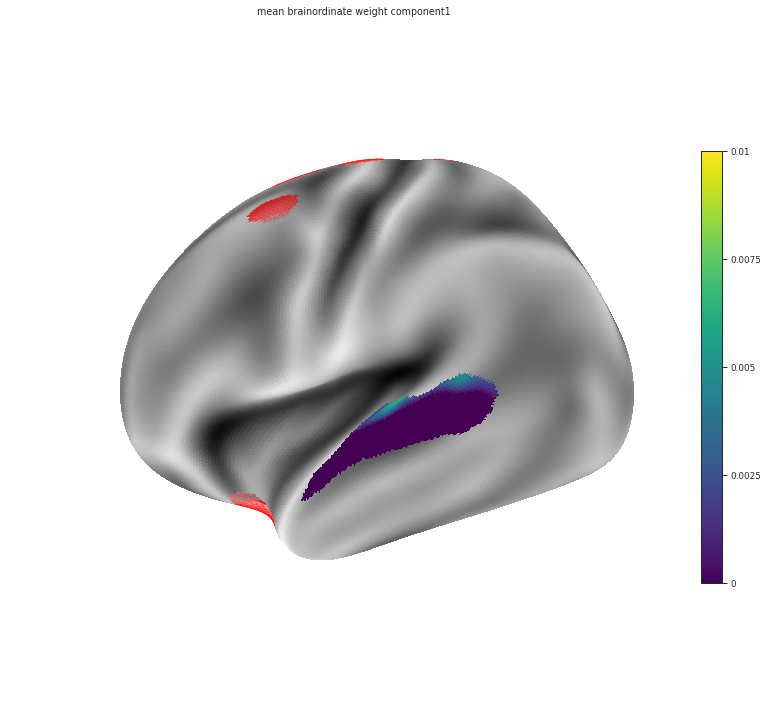

<Figure size 1440x1440 with 0 Axes>

Error in callback <function flush_figures at 0x2b754a949dc0> (for post_execute):



KeyboardInterrupt



In [119]:
#plot mean weights of each component
n_voxels=1721
for c in np.arange(6):
    current_vx = S_mean[:,c]
    r2_91k = np.zeros(91282)
    r2_91k[:] = 0
    r2_91k[r2_roi_91k_ind] = current_vx[:len(r2_roi_91k_ind)]

    #plot one subject trained on 1 tested on 1 Ridge 
    fig = plt.figure(figsize=(20,20))
    plot_surf(hcp.mesh.very_inflated,\
    hcp.cortex_data(r2_91k), hemi='left',cmap='viridis', colorbar=True,symmetric_cmap=False, vmin=0, vmax=0.01, avg_method='median',#figure=fig,\
    bg_map=hcp.mesh.sulc,\
    data_alpha=hcp.cortex_data(r2_all_binary),\
    data_remove=hcp.cortex_data(data_remove), title=f'mean brainordinate weight component{c+1}')
    plt.savefig(f'ica_out/l_component{c+1}.png')

0
[-1.74769132 -1.73309634 -1.73171604 ...  0.85996939  0.87522876
  0.88175578]
1
[-1.63291064 -1.62095092 -1.60912094 ...  0.95027284  0.99678845
  0.99687465]


<Figure size 1440x1440 with 0 Axes>

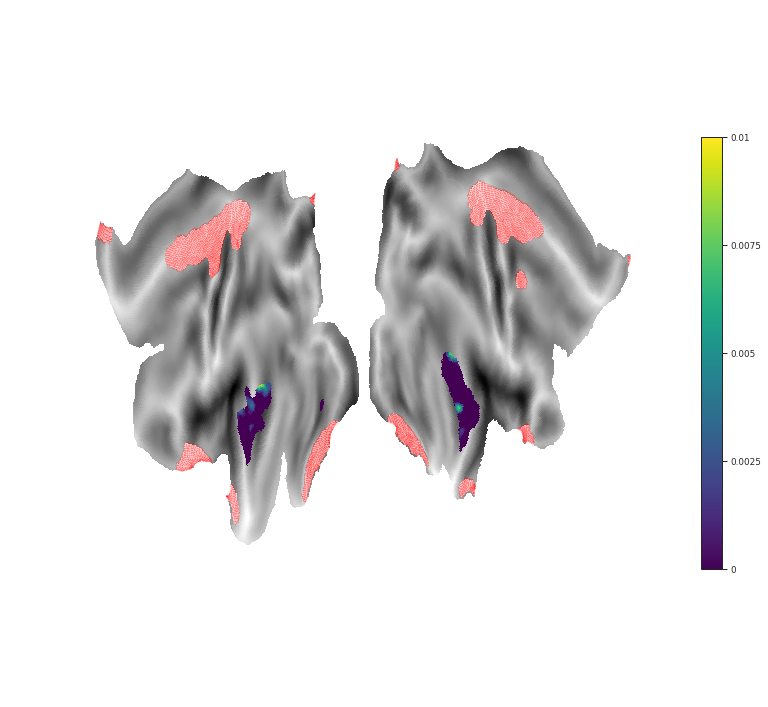

<Figure size 1440x1440 with 0 Axes>

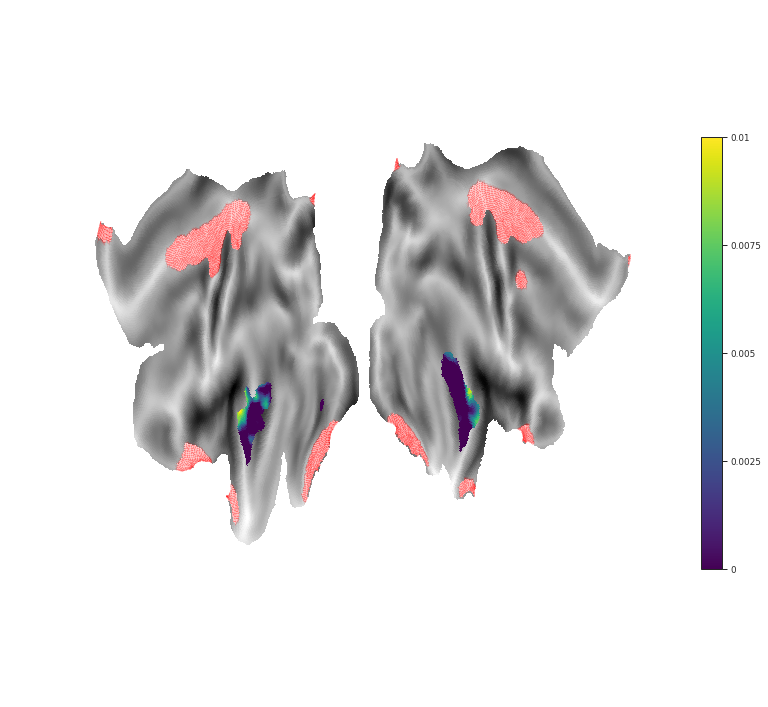

In [93]:
#plot component 1 for everyone.
n_voxels=1721
c=0
for i in np.arange(2):
    print(i)
    current_vx = S_[i*n_voxels:(i+1)*n_voxels,c]


    r2_91k = np.zeros(91282)
    r2_91k[:] = 0
    r2_91k[r2_roi_91k_ind] = current_vx[:len(r2_roi_91k_ind)]

    #plot one subject trained on 1 tested on 1 Ridge
    fig = plt.figure(figsize=(20,20))
    plot_surf(hcp.mesh.flat,\
    hcp.cortex_data(r2_91k), cmap='viridis', colorbar=True,symmetric_cmap=False, vmin=0, vmax=0.01, avg_method='median',#figure=fig,\
    bg_map=hcp.mesh.sulc,\
    data_alpha=hcp.cortex_data(r2_all_binary),\
    data_remove=hcp.cortex_data(data_remove))

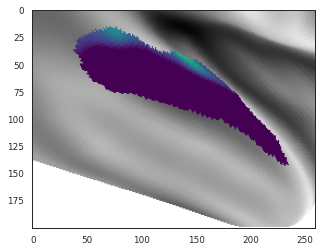

In [146]:
from PIL import Image
img = Image.open(f'ica_out/l_component1.png')
img = img.transpose(Image.FLIP_LEFT_RIGHT)
area = (240, 350, 500, 550)
cropped_img = img.crop(area)
plt.imshow(cropped_img)

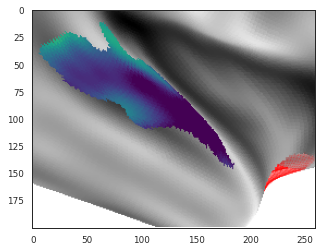

In [145]:
from PIL import Image
img = Image.open(f'ica_out/r_component1.png')
#img = img.transpose(Image.FLIP_LEFT_RIGHT)
area = (240, 350, 500, 550)
cropped_img = img.crop(area)
plt.imshow(cropped_img)

In [147]:
#crop things with pil

from PIL import Image    
for c in np.arange(6):
    img = Image.open(f'ica_out/l_component{c+1}.png')
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    area = (250, 350, 550, 550)
    cropped_img = img.crop(area)
    cropped_img.save(f'ica_out/crop_l_component{c+1}.png')
    
    img = Image.open(f'ica_out/r_component{c+1}.png')
    #img = img.transpose(Image.FLIP_LEFT_RIGHT)
    area = (250, 350, 550, 550)
    cropped_img = img.crop(area)
    cropped_img.save(f'ica_out/crop_r_component{c+1}.png')

    

## check variance explained with PCA

In [22]:
from sklearn.decomposition import PCA

with h5py.File(f'../outputs/encoding_model/cneuromod/friends/as_encoding/all_weights_VDS_test5.h5', "r") as f:
    pca = PCA(n_components=20)
    pca.fit(f["data"])

print(pca.explained_variance_ratio_)

[0.47163444 0.2161346  0.10981729 0.04154968 0.02532955 0.02142073
 0.01116426 0.01094871 0.00891396 0.008628   0.00728764 0.00584968
 0.00502477 0.00472757 0.00432986 0.00358005 0.00318143 0.00281193
 0.00267164 0.00234871]


In [23]:
from sklearn.decomposition import PCA

with h5py.File(f'../outputs/encoding_model/cneuromod/friends/as_encoding/all_weights_VDS_test20.h5', "r") as f:
    pca = PCA(n_components=20)
    pca.fit(f["data"])

print(pca.explained_variance_ratio_)

[0.40173928 0.24769333 0.12341105 0.04540869 0.02395903 0.01780176
 0.0133708  0.01102714 0.0082796  0.00661014 0.00636285 0.00585279
 0.00516872 0.00432449 0.00413945 0.00400336 0.0039496  0.00365922
 0.00348928 0.00320182]
